In [31]:
import random
import io
import pickle

import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

### Datos

In [32]:
df = pd.read_csv('peter-pan.txt', sep='/n', header=None)

/var/folders/ws/7xr4y3vn2nv3l2gxgwhk4y4r0000gn/T/ipykernel_14070/473304629.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('peter-pan.txt', sep='/n', header=None)
/var/folders/ws/7xr4y3vn2nv3l2gxgwhk4y4r0000gn/T/ipykernel_14070/473304629.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('peter-pan.txt', sep='/n', header=None)


In [33]:
df.head(5)

,0
0,Chapter I.
1,PETER BREAKS THROUGH
2,"All children, except one, grow up. They soon k..."
3,way Wendy knew was this. One day when she was ...
4,"in a garden, and she plucked another ﬂower and..."


,0
0,Chapter I.
1,PETER BREAKS THROUGH
2,"All children, except one, grow up. They soon k..."
3,way Wendy knew was this. One day when she was ...
4,"in a garden, and she plucked another ﬂower and..."


In [34]:
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 3960
Cantidad de documentos: 3960


### Preprocesamiento

In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import pad_sequences

train_len = 4

Transformar las oraciones en secuencias (tokens) de palabras

In [36]:
corpus = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=0)[0]
corpus

'Chapter I. PETER BREAKS THROUGH All children, except one, grow up. They soon know that they will grow up, and the way Wendy knew was this. One day when she was two years old she was playing in a garden, and she plucked another ﬂower and ran with it to her mother. I suppose she must have looked rather delightful, for Mrs. Darling put her hand to her heart and cried, Oh, why can’t you remain like this for ever! This was all that passed between them on the subject, but henceforth Wendy knew that she must grow up. You always know after you are two. Two is the beginning of the end. Of course they lived at 14, and until Wendy came her mother was the chief one. She was a lovely lady, with a romantic mind and such a sweet mocking mouth. Her romantic mind was like the tiny boxes, one within the other, that come from the puzzling East, however many you discover there is always one more; and her sweet mocking mouth had one kiss on it that Wendy could never get, though there it was, perfectly con

'Chapter I. PETER BREAKS THROUGH All children, except one, grow up. They soon know that they will grow up, and the way Wendy knew was this. One day when she was two years old she was playing in a garden, and she plucked another ﬂower and ran with it to her mother. I suppose she must have looked rather delightful, for Mrs. Darling put her hand to her heart and cried, Oh, why can’t you remain like this for ever! This was all that passed between them on the subject, but henceforth Wendy knew that she must grow up. You always know after you are two. Two is the beginning of the end. Of course they lived at 14, and until Wendy came her mother was the chief one. She was a lovely lady, with a romantic mind and such a sweet mocking mouth. Her romantic mind was like the tiny boxes, one within the other, that come from the puzzling East, however many you discover there is always one more; and her sweet mocking mouth had one kiss on it that Wendy could never get, though there it was, perfectly con

In [37]:
tokens=text_to_word_sequence(corpus)

tokens[:20]

['chapter',
 'i',
 'peter',
 'breaks',
 'through',
 'all',
 'children',
 'except',
 'one',
 'grow',
 'up',
 'they',
 'soon',
 'know',
 'that',
 'they',
 'will',
 'grow',
 'up',
 'and']

['chapter',
 'i',
 'peter',
 'breaks',
 'through',
 'all',
 'children',
 'except',
 'one',
 'grow',
 'up',
 'they',
 'soon',
 'know',
 'that',
 'they',
 'will',
 'grow',
 'up',
 'and']

In [38]:
text_sequences = []
for i in range(train_len, len(tokens)):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [39]:
text_sequences

[['chapter', 'i', 'peter', 'breaks'],
 ['i', 'peter', 'breaks', 'through'],
 ['peter', 'breaks', 'through', 'all'],
 ['breaks', 'through', 'all', 'children'],
 ['through', 'all', 'children', 'except'],
 ['all', 'children', 'except', 'one'],
 ['children', 'except', 'one', 'grow'],
 ['except', 'one', 'grow', 'up'],
 ['one', 'grow', 'up', 'they'],
 ['grow', 'up', 'they', 'soon'],
 ['up', 'they', 'soon', 'know'],
 ['they', 'soon', 'know', 'that'],
 ['soon', 'know', 'that', 'they'],
 ['know', 'that', 'they', 'will'],
 ['that', 'they', 'will', 'grow'],
 ['they', 'will', 'grow', 'up'],
 ['will', 'grow', 'up', 'and'],
 ['grow', 'up', 'and', 'the'],
 ['up', 'and', 'the', 'way'],
 ['and', 'the', 'way', 'wendy'],
 ['the', 'way', 'wendy', 'knew'],
 ['way', 'wendy', 'knew', 'was'],
 ['wendy', 'knew', 'was', 'this'],
 ['knew', 'was', 'this', 'one'],
 ['was', 'this', 'one', 'day'],
 ['this', 'one', 'day', 'when'],
 ['one', 'day', 'when', 'she'],
 ['day', 'when', 'she', 'was'],
 ['when', 'she', 'was',

[['chapter', 'i', 'peter', 'breaks'],
 ['i', 'peter', 'breaks', 'through'],
 ['peter', 'breaks', 'through', 'all'],
 ['breaks', 'through', 'all', 'children'],
 ['through', 'all', 'children', 'except'],
 ['all', 'children', 'except', 'one'],
 ['children', 'except', 'one', 'grow'],
 ['except', 'one', 'grow', 'up'],
 ['one', 'grow', 'up', 'they'],
 ['grow', 'up', 'they', 'soon'],
 ['up', 'they', 'soon', 'know'],
 ['they', 'soon', 'know', 'that'],
 ['soon', 'know', 'that', 'they'],
 ['know', 'that', 'they', 'will'],
 ['that', 'they', 'will', 'grow'],
 ['they', 'will', 'grow', 'up'],
 ['will', 'grow', 'up', 'and'],
 ['grow', 'up', 'and', 'the'],
 ['up', 'and', 'the', 'way'],
 ['and', 'the', 'way', 'wendy'],
 ['the', 'way', 'wendy', 'knew'],
 ['way', 'wendy', 'knew', 'was'],
 ['wendy', 'knew', 'was', 'this'],
 ['knew', 'was', 'this', 'one'],
 ['was', 'this', 'one', 'day'],
 ['this', 'one', 'day', 'when'],
 ['one', 'day', 'when', 'she'],
 ['day', 'when', 'she', 'was'],
 ['when', 'she', 'was',

Crear los vectores de palabras (word2vec)

In [40]:
tok = Tokenizer() 

tok.fit_on_texts(text_sequences) 

sequences = tok.texts_to_sequences(text_sequences)

In [41]:
sequences[:20]

[[349, 18, 21, 1646],
 [18, 21, 1646, 135],
 [21, 1646, 135, 32],
 [1646, 135, 32, 74],
 [135, 32, 74, 306],
 [32, 74, 306, 39],
 [74, 306, 39, 580],
 [306, 39, 580, 46],
 [39, 580, 46, 12],
 [580, 46, 12, 202],
 [46, 12, 202, 75],
 [12, 202, 75, 10],
 [202, 75, 10, 12],
 [75, 10, 12, 80],
 [10, 12, 80, 580],
 [12, 80, 580, 46],
 [80, 580, 46, 2],
 [580, 46, 2, 1],
 [46, 2, 1, 79],
 [2, 1, 79, 27]]

[[349, 18, 21, 1646],
 [18, 21, 1646, 135],
 [21, 1646, 135, 32],
 [1646, 135, 32, 74],
 [135, 32, 74, 306],
 [32, 74, 306, 39],
 [74, 306, 39, 580],
 [306, 39, 580, 46],
 [39, 580, 46, 12],
 [580, 46, 12, 202],
 [46, 12, 202, 75],
 [12, 202, 75, 10],
 [202, 75, 10, 12],
 [75, 10, 12, 80],
 [10, 12, 80, 580],
 [12, 80, 580, 46],
 [80, 580, 46, 2],
 [580, 46, 2, 1],
 [46, 2, 1, 79],
 [2, 1, 79, 27]]

In [42]:
print(tok.document_count)

47327
47327


In [43]:
print(len(tok.word_counts))

4979
4979


In [44]:
print(tok.word_index)

{'the': 1, 'and': 2, 'to': 3, 'he': 4, 'a': 5, 'was': 6, 'of': 7, 'it': 8, 'in': 9, 'that': 10, 'she': 11, 'they': 12, 'had': 13, 'you': 14, 'but': 15, 'his': 16, 'her': 17, 'i': 18, 'not': 19, 'for': 20, 'peter': 21, 'said': 22, 'on': 23, 'is': 24, 'him': 25, 'as': 26, 'wendy': 27, 'with': 28, 'at': 29, 'them': 30, 'have': 31, 'all': 32, 'were': 33, 'so': 34, 'be': 35, 'this': 36, 'their': 37, 'would': 38, 'one': 39, 'no': 40, 'are': 41, 'there': 42, 'when': 43, 'by': 44, 'out': 45, 'up': 46, 'if': 47, 'what': 48, 'now': 49, 'we': 50, 'hook': 51, 'then': 52, 'who': 53, 'could': 54, 'cried': 55, 'been': 56, 'from': 57, 'do': 58, 'did': 59, 'john': 60, 'time': 61, 'which': 62, 'darling': 63, 'see': 64, 'about': 65, 'me': 66, 'little': 67, 'michael': 68, 'into': 69, 'boys': 70, 'an': 71, 'again': 72, 'like': 73, 'children': 74, 'know': 75, 'only': 76, 'mother': 77, 'night': 78, 'way': 79, 'will': 80, 'how': 81, 'my': 82, 'never': 83, 'go': 84, 'more': 85, 'thought': 86, 'just': 87, 'came

In [45]:
print(tok.word_docs)

defaultdict(<class 'int'>, {'breaks': 8, 'i': 1654, 'peter': 1479, 'chapter': 65, 'through': 200, 'all': 1000, 'children': 372, 'except': 76, 'one': 833, 'grow': 32, 'up': 652, 'they': 2307, 'soon': 128, 'know': 368, 'that': 2464, 'will': 332, 'and': 5508, 'the': 9036, 'way': 341, 'wendy': 1307, 'knew': 274, 'was': 3687, 'this': 869, 'day': 116, 'when': 700, 'she': 2358, 'two': 173, 'years': 24, 'old': 104, 'playing': 44, 'in': 2676, 'a': 3688, 'garden': 4, 'plucked': 8, 'another': 128, 'ﬂower': 8, 'ran': 68, 'with': 1308, 'it': 3125, 'to': 4665, 'her': 1840, 'mother': 352, 'suppose': 44, 'must': 240, 'have': 1028, 'looked': 136, 'rather': 172, 'delightful': 16, 'for': 1533, 'mrs': 288, 'darling': 443, 'put': 168, 'hand': 226, 'heart': 72, 'cried': 544, 'oh': 220, 'why': 146, 'can’t': 110, 'you': 1909, 'remain': 16, 'like': 376, 'ever': 200, 'passed': 56, 'between': 52, 'them': 1109, 'on': 1412, 'subject': 16, 'but': 1904, 'henceforth': 8, 'always': 213, 'after': 208, 'are': 762, 'is':

In [46]:
print("Cantidad de rows del dataset:", len(sequences))

Cantidad de rows del dataset: 47327
Cantidad de rows del dataset: 47327


### Input y target

In [47]:
arr_sequences = np.array(sequences)
x_data = arr_sequences[:,:-1]
y_data_int = arr_sequences[:,-1] # aún falta el oneHotEncoder

print(x_data.shape)
print(y_data_int.shape)

(47327, 3)
(47327,)
(47327, 3)
(47327,)


In [48]:
# Palabras del vocabulario
tok.index_word

{1: 'the',
 2: 'and',
 3: 'to',
 4: 'he',
 5: 'a',
 6: 'was',
 7: 'of',
 8: 'it',
 9: 'in',
 10: 'that',
 11: 'she',
 12: 'they',
 13: 'had',
 14: 'you',
 15: 'but',
 16: 'his',
 17: 'her',
 18: 'i',
 19: 'not',
 20: 'for',
 21: 'peter',
 22: 'said',
 23: 'on',
 24: 'is',
 25: 'him',
 26: 'as',
 27: 'wendy',
 28: 'with',
 29: 'at',
 30: 'them',
 31: 'have',
 32: 'all',
 33: 'were',
 34: 'so',
 35: 'be',
 36: 'this',
 37: 'their',
 38: 'would',
 39: 'one',
 40: 'no',
 41: 'are',
 42: 'there',
 43: 'when',
 44: 'by',
 45: 'out',
 46: 'up',
 47: 'if',
 48: 'what',
 49: 'now',
 50: 'we',
 51: 'hook',
 52: 'then',
 53: 'who',
 54: 'could',
 55: 'cried',
 56: 'been',
 57: 'from',
 58: 'do',
 59: 'did',
 60: 'john',
 61: 'time',
 62: 'which',
 63: 'darling',
 64: 'see',
 65: 'about',
 66: 'me',
 67: 'little',
 68: 'michael',
 69: 'into',
 70: 'boys',
 71: 'an',
 72: 'again',
 73: 'like',
 74: 'children',
 75: 'know',
 76: 'only',
 77: 'mother',
 78: 'night',
 79: 'way',
 80: 'will',
 81: 'how

{1: 'the',
 2: 'and',
 3: 'to',
 4: 'he',
 5: 'a',
 6: 'was',
 7: 'of',
 8: 'it',
 9: 'in',
 10: 'that',
 11: 'she',
 12: 'they',
 13: 'had',
 14: 'you',
 15: 'but',
 16: 'his',
 17: 'her',
 18: 'i',
 19: 'not',
 20: 'for',
 21: 'peter',
 22: 'said',
 23: 'on',
 24: 'is',
 25: 'him',
 26: 'as',
 27: 'wendy',
 28: 'with',
 29: 'at',
 30: 'them',
 31: 'have',
 32: 'all',
 33: 'were',
 34: 'so',
 35: 'be',
 36: 'this',
 37: 'their',
 38: 'would',
 39: 'one',
 40: 'no',
 41: 'are',
 42: 'there',
 43: 'when',
 44: 'by',
 45: 'out',
 46: 'up',
 47: 'if',
 48: 'what',
 49: 'now',
 50: 'we',
 51: 'hook',
 52: 'then',
 53: 'who',
 54: 'could',
 55: 'cried',
 56: 'been',
 57: 'from',
 58: 'do',
 59: 'did',
 60: 'john',
 61: 'time',
 62: 'which',
 63: 'darling',
 64: 'see',
 65: 'about',
 66: 'me',
 67: 'little',
 68: 'michael',
 69: 'into',
 70: 'boys',
 71: 'an',
 72: 'again',
 73: 'like',
 74: 'children',
 75: 'know',
 76: 'only',
 77: 'mother',
 78: 'night',
 79: 'way',
 80: 'will',
 81: 'how

In [49]:
# Cantidad de palabras en el vocabulario
vocab_size = len(tok.word_counts)
vocab_size

4979

4979

In [50]:
y_data_int_offset = y_data_int - 1
y_data = to_categorical(y_data_int_offset, num_classes=vocab_size) 
y_data.shape

(47327, 4979)

(47327, 4979)

### Entrenar el modelo

In [51]:
# largo de la secuencia de entrada
input_seq_len = x_data.shape[1] 
input_seq_len

3

3

In [52]:
output_size = vocab_size
output_size

4979

4979

In [53]:
model = Sequential()

model.add(Embedding(input_dim=vocab_size+1, output_dim=5, input_length=input_seq_len))

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))

model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 5)              24900     
                                                                 
 lstm (LSTM)                 (None, 3, 64)             17920     
                                                                 
 dropout (Dropout)           (None, 3, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 4979)              164307    
                                                                 
Total params: 242,231


In [54]:
hist = model.fit(x_data, y_data, epochs=150, validation_split=0.2)

Epoch 1/150


2023-08-07 16:51:24.780764: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1184/1184 [==============================] - 29s 24ms/step - loss: 6.6235 - accuracy: 0.0490 - val_loss: 6.4851 - val_accuracy: 0.0480
Epoch 2/150
1184/1184 [==============================] - 29s 24ms/step - loss: 6.2887 - accuracy: 0.0494 - val_loss: 6.4688 - val_accuracy: 0.0480
Epoch 3/150
1184/1184 [==============================] - 29s 25ms/step - loss: 6.1857 - accuracy: 0.0494 - val_loss: 6.4766 - val_accuracy: 0.0480
Epoch 4/150
1184/1184 [==============================] - 28s 24ms/step - loss: 6.0850 - accuracy: 0.0517 - val_loss: 6.4635 - val_accuracy: 0.0524
Epoch 5/150
1184/1184 [==============================] - 27s 23ms/step - loss: 5.9265 - accuracy: 0.0581 - val_loss: 6.4518 - val_accuracy: 0.0543
Epoch 6/150
1184/1184 [==============================] - 28s 24ms/step - loss: 5.7790 - accuracy: 0.0631 - val_loss: 6.4823 - val_accuracy: 0.0587
Epoch 7/150
1184/1184 [==============================] - 26s 22ms/step - loss: 5.6741 - accuracy: 0.0675 - val_loss: 6.5628 - val_

KeyboardInterrupt: 

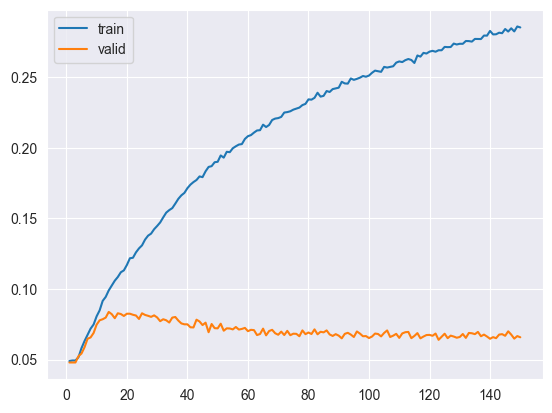

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_accuracy'], label='valid')
plt.show()

### Predicción de próxima palabra

In [55]:
import sys
!{sys.executable} -m pip install gradio --quiet

In [ ]:
import gradio as gr

def model_response(human_text):

    # Encodeamos
    encoded = tok.texts_to_sequences([human_text])[0]
    # Si tienen distinto largo
    encoded = pad_sequences([encoded], maxlen=3, padding='pre')
    
    # Predicción softmax
    y_hat = model.predict(encoded).argmax(axis=-1)

    # Debemos buscar en el vocabulario la palabra
    # que corresopnde al indice (y_hat) predicho por le modelo
    out_word = ''
    for word, index in tok.word_index.items():
        if index == y_hat:
            out_word = word
            break

    print(f'Input: {human_text}')
    print(f'Output: {out_word}')
    # Agrego la palabra a la frase predicha
    return human_text + ' ' + out_word

iface = gr.Interface(
    fn=model_response,
    inputs=["textbox"],
    outputs="text",
    layout="vertical")

iface.launch(debug=True)

/var/folders/ws/7xr4y3vn2nv3l2gxgwhk4y4r0000gn/T/ipykernel_14070/1839767257.py:26: GradioDeprecationWarning: `layout` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 321ms/step
Input: peter
Output: 
1/1 [==============================] - 0s 22ms/step
Input: peter pan
Output: 
